<a href="https://colab.research.google.com/github/Aasthapaudel/Netflix-dataanalysis/blob/main/netflix_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('/content/sample_data/mymoviedb.csv', lineterminator='\n')

In [6]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [8]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


**df**.duplicated().sum()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# @title Default title text
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### **New Section**
##Exploration summary


*   we have a dataframe consisting of 9827 rows and 9 columns.

*   release_ date column needs to be casted into date time and to extarct only the year


*   our dataset looks a bit tidy with no NaNs nor duplicated values

*   there is noticable outliers in popularity column

*   vote_average better be categorised for proper analysis
*   Genre column has comma separated values and whotespaces that needs to be handled and casted into category








In [11]:
df['Release_Dates']=pd.to_datetime(df['Release_Date'])
print(df['Release_Dates'])
print(df['Release_Dates'].dtypes)

0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9822   1973-10-15
9823   2020-10-01
9824   2016-05-06
9825   2021-03-31
9826   1984-09-23
Name: Release_Dates, Length: 9827, dtype: datetime64[ns]
datetime64[ns]


In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [13]:
print(df['Release_Dates'].dtypes)


datetime64[ns]


In [14]:
invalid_dates = df[df['Release_Dates'].isna()]


In [15]:
print(invalid_dates)


Empty DataFrame
Columns: [Release_Date, Title, Overview, Popularity, Vote_Count, Vote_Average, Original_Language, Genre, Poster_Url, Release_Dates]
Index: []


In [49]:
df['Release_Date']= df['Release_Date'].dt.year


In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15
3,2022,The Batman,3827.658,1151,popular,Crime,2022-03-01
4,2022,The Batman,3827.658,1151,popular,Mystery,2022-03-01


In [51]:
print(df['Release_Date'].dtypes)

int32


In [18]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [19]:
cols = ['Overview','Original_Language','Poster_Url']
print(cols)

['Overview', 'Original_Language', 'Poster_Url']


In [20]:
df.drop(cols, axis= 1,inplace= True)


In [21]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_Dates'],
      dtype='object')

In [52]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15
3,2022,The Batman,3827.658,1151,popular,Crime,2022-03-01
4,2022,The Batman,3827.658,1151,popular,Mystery,2022-03-01


categorizing vote_Average column
We would cut the Vote_Average values and make 4 categories : popular average below_avg not_popular to describe it more using catigorize_col() function provided above

In [53]:
def categorize_col(df,col,labels):
  edges = [df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]
  df[col] =pd.cut(df[col],edges , labels=labels, duplicates ='drop')
  return df

In [54]:
labels = ['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average',labels)


KeyError: 'min'

In [55]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [56]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15
3,2022,The Batman,3827.658,1151,popular,Crime,2022-03-01
4,2022,The Batman,3827.658,1151,popular,Mystery,2022-03-01


In [27]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [28]:
df.dropna(inplace=True)

In [29]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Dates,0


In [30]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021-12-15
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022-03-01
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022-02-25
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021-11-24
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021-12-22


**we'd split genres into a list and then explode our dataframe to have one genre per row for each movie**

In [57]:
df['Genre'] =df['Genre'].str.split(', ')

In [58]:
df =df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15
3,2022,The Batman,3827.658,1151,popular,Crime,2022-03-01
4,2022,The Batman,3827.658,1151,popular,Mystery,2022-03-01


**casting column into category**

In [59]:
df['Genre'] = df['Genre'].astype('category')
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Release_Date   25552 non-null  datetime64[ns]
 1   Title          25552 non-null  object        
 2   Popularity     25552 non-null  float64       
 3   Vote_Count     25552 non-null  int64         
 4   Vote_Average   25552 non-null  category      
 5   Genre          25552 non-null  category      
 6   Release_Dates  25552 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 1.0+ MB


In [37]:
df.nunique()

,0
Release_Date,5846
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19
Release_Dates,5846


In [60]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15
3,2022,The Batman,3827.658,1151,popular,Crime,2022-03-01
4,2022,The Batman,3827.658,1151,popular,Mystery,2022-03-01


**Data visualization**

In [39]:
sns.set_style('whitegrid')

# What is the mpst frequent genre of movies released on Netflix ?

In [41]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


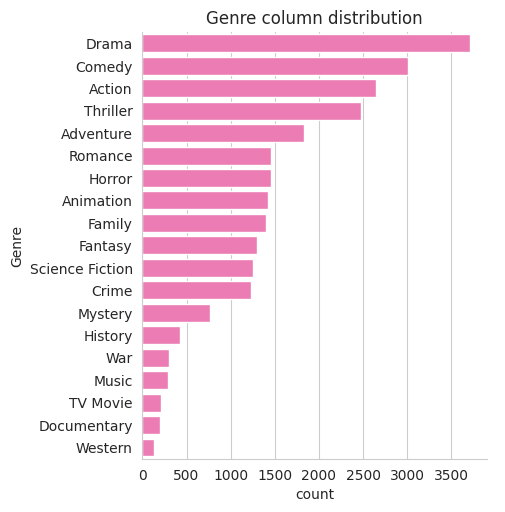

In [42]:
sns.catplot(y ='Genre',data =df,kind='count',order =df['Genre'].value_counts().index,
            color= "hotpink"
            )
plt.title('Genre column distribution')
plt.show()

# what is the hightest vote in vote_avearge column?

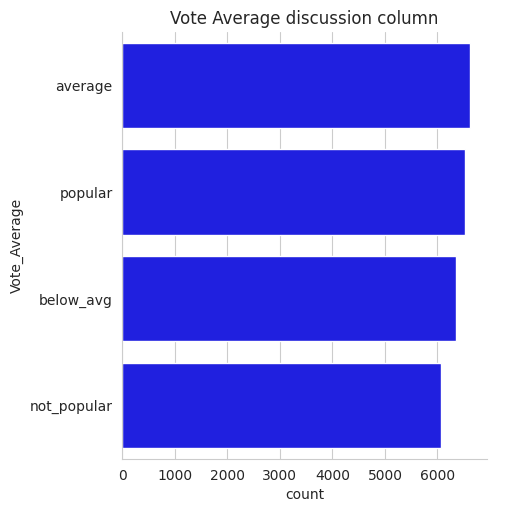

In [44]:
sns.catplot(y='Vote_Average', data=df, kind= 'count',order= df['Vote_Average'].value_counts().index
,color="blue"
)
plt.title('Vote Average discussion column')
plt.show(

)

# which movie got the highest popularity? what's its genre?

In [61]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15


# Which movie got the lowest popularity? what's its genre?

In [62]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Dates
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music,2021-03-31
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama,2021-03-31
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History,2021-03-31
25549,1984,Threads,13.354,186,popular,War,1984-09-23
25550,1984,Threads,13.354,186,popular,Drama,1984-09-23
25551,1984,Threads,13.354,186,popular,Science Fiction,1984-09-23


# which year has the most filmmed movies?

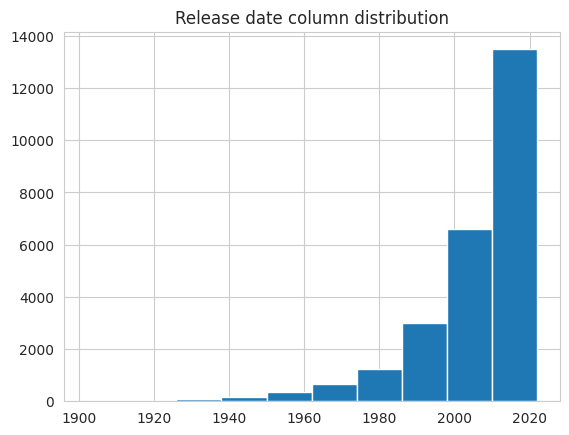

In [63]:
df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.show()